# Clean And Analyze Employee Exit Surveys

## Introduction

### Preliminary

This Notebook is the conclusion of the ***Data Cleaning and Analysis course*** from [dataquest.io](dataquest.io). It is a guided project whose aim is to use all the techniques and skills learnt during the course. Nevertheless we are dealing with real-word data: in our case with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).
> I am sometimes using blockquotes as this one, meaning that for the rest of the project I am quoting some elements given by dataquest. For the sake of simplicity and clarity, I estimated that they did not need any reformulation and were immediately usable and convenient for me and the reader.

### Context

>In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

>- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
>- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

>They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

>A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

>Below is a preview of a couple columns we'll work with from the **`dete_survey.csv`**:

>- ID: An id used to identify the participant of the survey
>- SeparationType: The reason why the person's employment ended
>- Cease Date: The year or month the person's employment ended
>- DETE Start Date: The year the person began employment with the DETE

>Below is a preview of a couple columns we'll work with from the **`tafe_survey.csv`**:

>- Record ID: An id used to identify the participant of the survey
>- Reason for ceasing employment: The reason why the person's employment ended
>- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)


## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

pd.set_option('mode.chained_assignment', None)


%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### Duplicate Values

In [4]:
dup1 = dete_survey.duplicated()
dup2 = tafe_survey.duplicated()


In [5]:
print(dup1.sum())
print(dup2.sum())

0
0


They are not duplicate rows in our two data sets.

### Missing Values

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
dete_survey.isnull().sum().value_counts()

0      24
5       3
9       3
6       2
10      2
11      2
696     1
7       1
8       1
12      1
14      1
790     1
87      1
56      1
29      1
30      1
799     1
34      1
805     1
815     1
367     1
819     1
76      1
54      1
55      1
24      1
dtype: int64

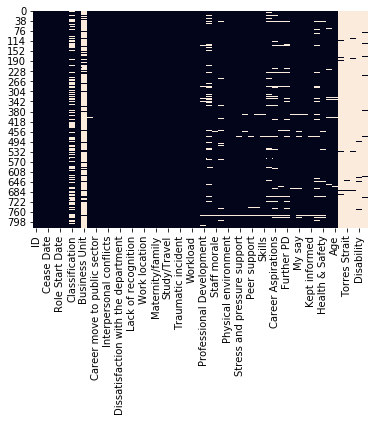

In [8]:
sns.heatmap(dete_survey.isnull(), cbar=False)

In [9]:
dete_survey['Classification'].isnull().sum()

367

The **dete_servey** dataset has 822 rows and 56 colums (two thirds of them are filled with strings, and the rest with boolean values, except for only one column which has integer.)

Over the 56 columns, 24 are fully filled (= 0 null values). At first sight, we might consider that 6 columns could be removed are they are mostly empty :
- Business Unit (695 null values)
- Aboriginal (around 800 null values for this one and tne next four)
- Torres Strait
- South Sea
- Disability
- NESB

The classification column has 367 null values.

As for the other 26 columns remaining, they have between 5 and 87 missing values, so between 0.6 and 10.6% missing values. So at first they should be investaged more before thinking of eventually dropping them.

Another important point is that this data set has **'Not Stated'** values which account for Nan values, thus we should remplace them with **`NaN`** values instead, so we can cout all of them better.

In [10]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

Now we are going to drop the columns **28 to 49** (included) as they are not usefull for our analysis

In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [12]:
dete_survey_updated.shape

(822, 35)

In [13]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [14]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [15]:
tafe_survey.isnull().sum().sort_values()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
Reason for ceasing employment                                                                                                                                      1
CESSATION YEAR                                                                                                                                                     7
Induction. Did you undertake Workplace Induction?                                                                                                                 83
InstituteV

In [16]:
tafe_survey.isnull().sum().value_counts().sort_values()

262     1
116     1
105     1
88      1
87      1
83      1
589     1
99      1
172     1
149     1
108     1
270     1
115     1
7       1
100     1
121     1
219     1
97      1
1       1
101     2
91      2
95      2
89      2
96      2
0       3
93      4
92      5
94      6
106     6
147     7
265    12
dtype: int64

The tafe_survey dataset has 702 rows and 72 columns mainly containing strings (70) and float (2).
Concerning the missing values we can see quickly that :
- the 12 Contributions Factors columns have 265 (more than 1/3) of its values missing.
- the 7 Inductions infos colum have 147 (= 20%) of its values missing.
- the ***main factor*** columns has 589 of its values missing so it coulbe be dropped.
- only 3 columns have 0 missing values.

Conclusion : for this data set, we have to investigate further to see which columns or rows we can drop without loosing valuable information.

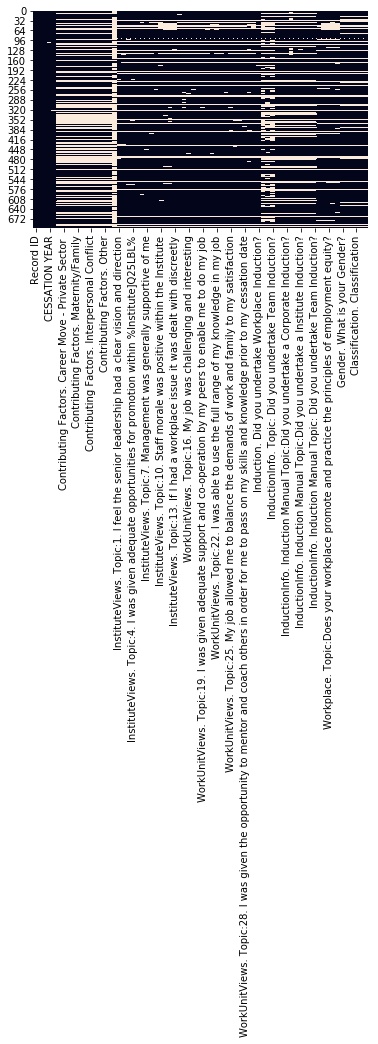

In [17]:
sns.heatmap(tafe_survey.isnull(), cbar=False)

On plotting the heatmap representing the null values (light grey), we can see that this data is sparser than the other one.

We are going to drop the columns **17 to 66** in this data set as they are not usefull for our analysis.

In [18]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [19]:
tafe_survey_updated.shape

(702, 23)

### Standardizing the colums names

In [20]:
dete_survey_updated.columns


Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [21]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

As printed above, our two data sets have many identical columns but they do not have the same exact name, see below a few examples (DETE // TAFE):   
- ID // Record ID
- SeparationType // Reason for ceasing employment
- Cease Date // CESSATION YEAR
- Age // CurrentAge. Current Age

As latter we will we want to combine both data set, we need to standardize the colums names. That is :
- for dete\_survey : put the column names in lower case, remove spaces at the end, and remove the space between strings by a '\_' e-g : Cease Date becomes cease_date ...
- for tafe\_survey : rename the columns so they have the same names as dete\_survey. e-g : 'CESSATION YEAR' becomes 'cease\_date', 'Record ID' : 'id' and so on ...

In [22]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [23]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [24]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [25]:
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype',
                                                  'Gender. What is your Gender?': 'gender',
                                                  'CurrentAge. Current Age': 'age',
                                                  'Employment Type. Employment Type': 'employment_status',
                                                  'Classification. Classification': 'position',
                                                  'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'})

In [26]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [27]:
tafe_survey_updated.head(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [28]:
dete_survey_updated.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### Filtering out the resignations

In [29]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [30]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

As, for our anlysis, we are only interested with people who resigned we are going to filter our dataframes. So for both of them we printed the unique values in the 'seperationtype' column and we can see that : for the dete_survey there are actually three sub-category for the 'Resignation' (Other Reasons, Other Employer, and Move overseas...) so we will get the three of them. For tafe_survey there is one category 'Resignation'

In [31]:
dete_resignations=dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')]

In [32]:
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation']

### Checking the consistency of our dates

Before going further with our analysis let's recall of our end goals :

>Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Thus we are going to check for the consistency of our data and specially with our dates. Indeed if we were to realize that many of our data have incoherent values we would not keep on the analysis.  
So we'll check briefly in the values in our **cease_date** (the year when the employee resigned) and **dete_start_date** (the year when the employee started their job, only on the dete data set) are logical and coherent, that is : normally there should not be dates before 1940 and after the current date.

In [33]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
Name: cease_date, dtype: int64

In [34]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [35]:
dete_resignations['cease_date']=dete_resignations['cease_date'].str.extract(r"([1-2][0-9]{3})").astype(float)

/Users/louisboivin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [36]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [37]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

As shown above, there are no incoherent values in our dates columns.

### Years of service


As we are interested in the work years of the employees we need to check if the information is already available in our data sets. On the ***tafe*** data set the column 'institute_service' contains this information. See below

In [38]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [39]:
tafe_resignations['institute_service'].unique()

array([nan, '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

In [40]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

The ***dete*** data set does not have such a column per se, nevertheless with the 'cease_date' (end year when the employee resigned) and the 'dete_start_date' (beginning year) we are able to calculate the information by substracting the start date to the end date.

In [41]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']

In [42]:
dete_resignations['institute_service'].unique()

array([  7.,  18.,   3.,  15.,  14.,   5.,  nan,  30.,  32.,  39.,  17.,
         9.,   6.,   1.,  35.,  38.,  36.,  19.,   4.,  26.,  10.,   8.,
         2.,   0.,  23.,  13.,  16.,  12.,  21.,  20.,  24.,  33.,  22.,
        28.,  49.,  11.,  41.,  27.,  42.,  25.,  29.,  34.,  31.])

In [43]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


### Identifying employees who were dissatified

Recall that the question to answer is the following: 
>Are employees who have only worked for the institutes for a short period of time **resigning** due to some kind of **dissatisfaction**? What about employees who have been at the job longer?

So among the employees who resigned, we need to identify the ones for which it was due to dissatisfaction.

For the ***tafe*** data set, we will use the colums :
- Contributing Factors. Job Dissatisfaction
- Contributing Factors. Dissatisfaction

In [44]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [45]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

First we are going to remplace the values of these two columns to have instead only boolean values, that is "True" and "False". We will use the following rule :
- replace '-' by 'False'
- replace other values by 'True'


In [46]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
    

In [47]:
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']]= \
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)



In [48]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [49]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

We will use the df.any() function on the the two previous columns to create the **'dissatisfied'** column. It will have a True if any element in the selected columns is True. 

In [50]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']]\
.any(axis=1,skipna=False)

In [51]:
tafe_resignations_up = tafe_resignations.copy()

For the ***dete*** date set, we will use the job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,
lack_of_job_security,work_location,employment_conditions,work_life_balance,workload columns to create the **'dissatisfied'** column with the same df.any( ) function.


In [52]:
dete_resignations['dissatisfied'] =\
dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment',\
                   'lack_of_recognition','lack_of_job_security','work_location','employment_conditions',\
                   'work_life_balance', 'workload']].copy().any(axis=1,skipna=False)

In [53]:
dete_resignations_up = dete_resignations.copy()

In [54]:
tafe_resignations_up['institute'] = 'TAFE'
dete_resignations_up['institute'] = 'DETE'

In [55]:
tafe_resignations_up.shape

(340, 25)

In [56]:
dete_resignations_up.shape

(311, 38)

In [57]:
combined = pd.concat([tafe_resignations_up,dete_resignations_up])


Above we combined the two previous data sets vertically to get a new one. Now based on the number of non-null values, we will decide for each column if we keep it or if we drop it. Our criterion is : if there is less than 500 non-null values, we will drop the column.

In [58]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 821
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector                           332 non-null object
Contributing Factors. Career Move - Public Sector                            332 non-null object
Contributing Factors. Career Move - Self-employment                          332 non-null object
Contributing Factors. Dissatisfaction                                        332 non-null object
Contributing Factors. Ill Health                                             332 non-null object
Contributing Factors. Interpersonal Conflict                                 332 non-null object
Contributing Factors. Job Dissatisfaction                                    332 non-null object
Contributing Factors. Maternity/Family                                       332 non-null object
Contributing Factors. NONE                                                   332 non-null object
Contributing Factors. 

In [59]:
combined_update = combined.dropna(axis=1, thresh = 500)

In [60]:
combined_update.shape

(651, 10)

We got now a very reduced dataframe with no more than 10 columns and 651 rows. We will now agregate our data on the **'institute_service'** column.

### Aggregating on the institute service column

In [61]:
combined_update['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
12.0                   6
10.0                   6
14.0                   6
22.0                   6
17.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2


As we can see above, the insitute_service has very different values and types, we need to harmonize this column and to do so we will implement a new classification:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company




In [62]:
combined_update['institute_service']=combined_update['institute_service'].astype(str)

In [63]:
combined_update['institute_service'].value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
17.0                   6
10.0                   6
22.0                   6
12.0                   6
14.0                   6
18.0                   5
16.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
28.0                   2
26.0                   2
30.0                   2
36.0                   2
25.0                   2


In [64]:
combined_update['institute_service']=combined_update['institute_service'].str.extract(r"(?P<Years>[0-9]+)")

/Users/louisboivin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [65]:
combined_update['institute_service']=combined_update['institute_service'].astype(float)

In [66]:
def update_serv(val):
    if pd.isnull(val):
        return np.nan
    elif val<3:
        return 'New'
    elif 3<=val<7:
        return 'Experienced'
    elif 7<=val<11:
        return 'Established'
    else:
        return 'Veteran'

In [67]:
combined_update['service_cat'] = combined_update['institute_service'].apply(update_serv)

In [68]:
combined_update['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### Filling up the Dissatisfied column

In [69]:
combined_update['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [70]:
combined_update['dissatisfied']=combined_update['dissatisfied'].fillna(False)

In [71]:
combined_update.pivot_table(values='dissatisfied',index='service_cat')

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


In [72]:
%matplotlib inline

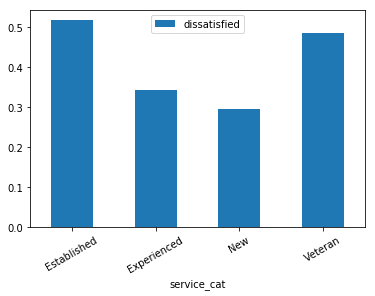

In [73]:
combined_update.pivot_table(values='dissatisfied',index='service_cat').plot(kind='bar',rot=30)

So we are now able to answer the first of our two questions :
>Are employees who have only worked for the institutes for a short period of time **resigning** due to some kind of **dissatisfaction**? What about employees who have been at the job longer?

We can now say that employees who worked for the institutes for a long time (more than 7 years) and resigned were more dissastified whith their jobs than the employees who worked there less time.